# 2 Features #

## Imports ##


In [63]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



## Data Importation and Preparation ##


In [64]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url,
                 header=None,
                 encoding='utf-8')

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values


## Graphing the 3 species configurations of Sepal length vs. Petal length ##


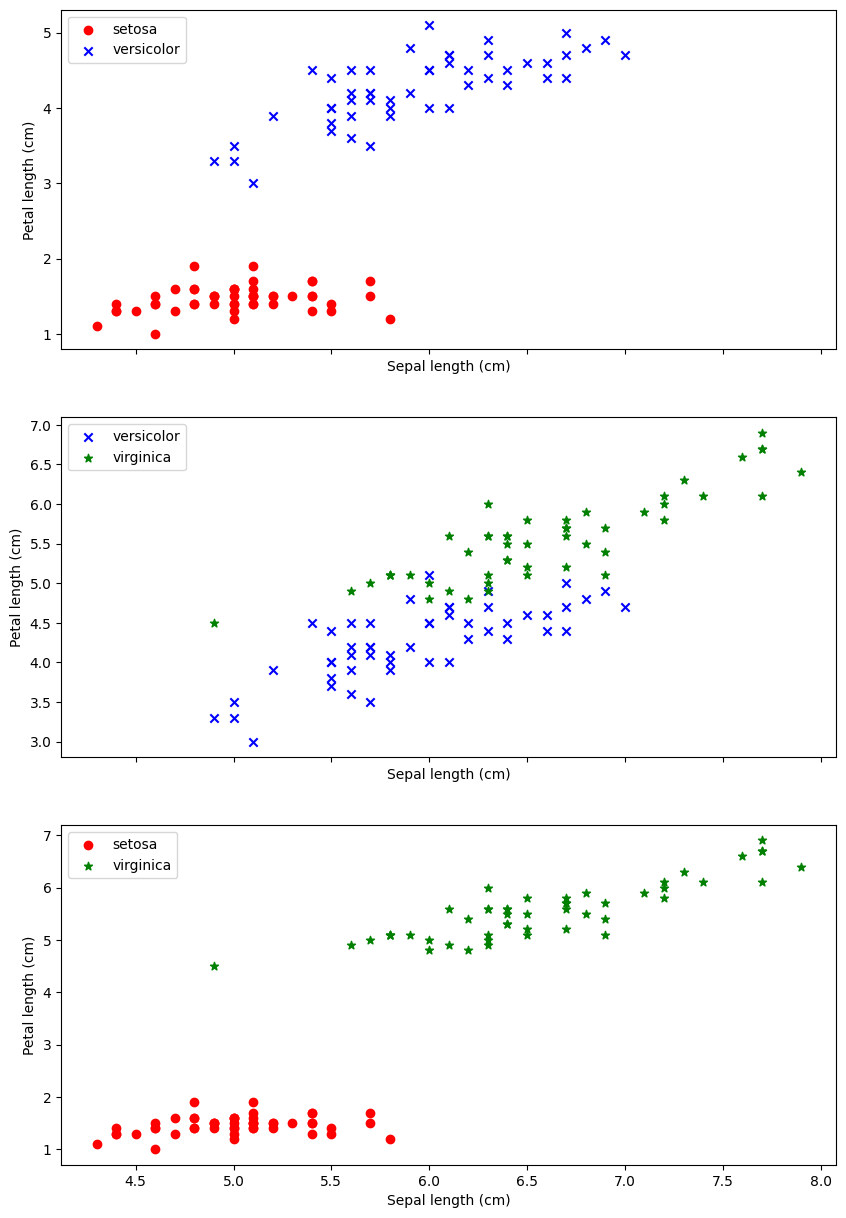

In [65]:
plt.close('all')

fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (10,15), sharex=True)

# Setosa & Versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

ax[0].scatter(X[:50, 0], X[:50, 1],
            color = 'red', marker = 'o', label = 'setosa')
ax[0].scatter(X[50:100, 0], X[50:100, 1],
            color = 'blue', marker = 'x', label = 'versicolor')

ax[0].set_xlabel('Sepal length (cm)')
ax[0].set_ylabel('Petal length (cm)')
ax[0].legend(loc = 'upper left')

# ----------------------------------------------
# Versicolor & Virginica

y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[50:150, [0, 2]].values

ax[1].scatter(X[:50, 0], X[:50, 1],
            color = 'blue', marker = 'x', label = 'versicolor')
ax[1].scatter(X[50:100, 0], X[50:100, 1],
            color = 'green', marker = '*', label = 'virginica')

ax[1].set_xlabel('Sepal length (cm)')
ax[1].set_ylabel('Petal length (cm)')
ax[1].legend(loc = 'upper left')

# ----------------------------------------------
# Setosa & Virginica

y1 = df.iloc[0:50, 4].values
y2 = df.iloc[100:150, 4].values
x1 = df.iloc[0:50, [0, 2]].values
x2 = df.iloc[100:150, [0, 2]].values

ax[2].scatter(x1[:50, 0], x1[:50, 1],
            color = 'red', marker = 'o', label = 'setosa')
ax[2].scatter(x2[:50, 0], x2[:50, 1],
            color = 'green', marker = '*', label = 'virginica')

ax[2].set_xlabel('Sepal length (cm)')
ax[2].set_ylabel('Petal length (cm)')
ax[2].legend(loc = 'upper left')


## Perceptron - Setosa & Versicolor (Sepal length vs petal length) ##


C:\Users\SGranaturov\AppData\Local\Temp\ipykernel_2012\4001875950.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


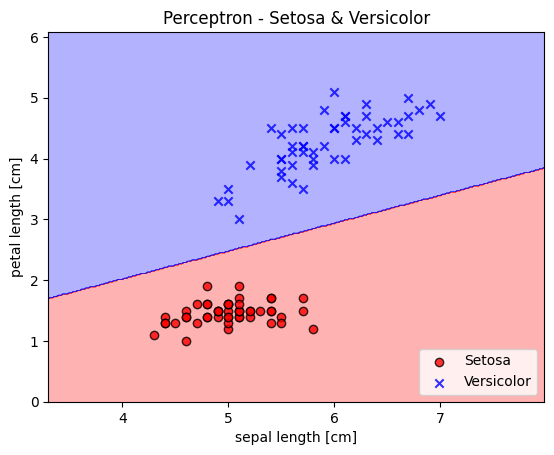

In [69]:
# Selecting X & y values from setosa & versicolor (sepal length vs petal length)
y_percep1 = df.iloc[0:100, 4].values
y_percep1 = np.where(y_percep1 == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X_percep1 = df.iloc[0:100, [0, 2]].values

# Creating Perceptron model
perceptron_model = Perceptron(eta0=0.1, max_iter=10)
perceptron_model.fit(X_percep1, y_percep1)

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'x', '*')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl, 
                    edgecolor='black')
plot_decision_regions(X_percep1, y_percep1, classifier = perceptron_model)
plt.title('Perceptron - Setosa & Versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

L = plt.legend(loc = 'lower right')
L.get_texts()[0].set_text("Setosa")
L.get_texts()[1].set_text("Versicolor")

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

## Creation of Adaline Model - Obtained from Python Machine Learning 3rd Edition Chapter 2 ##

In [71]:
class Adaline(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

### Determining an appropriate Learning Rate (.1? .01? .001? .0001?) ###
#### We want a decreasing graph - hence, the chosen learning curve is .0001 ####

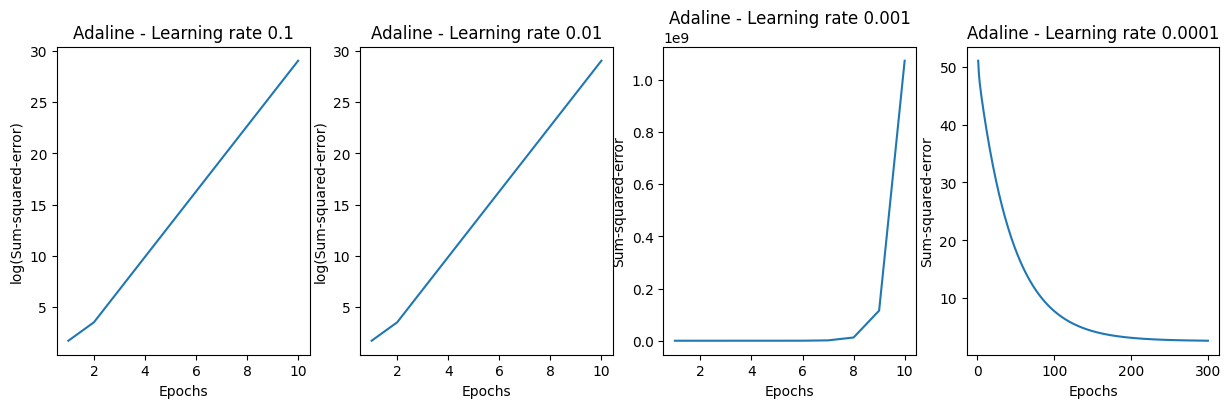

In [72]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 4))

ada1 = Adaline(n_iter = 10, eta = 0.01).fit(X_percep1, y_percep1)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = Adaline(n_iter = 10, eta = 0.01).fit(X_percep1, y_percep1)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.01')

ada3 = Adaline(n_iter = 10, eta = 0.001).fit(X_percep1, y_percep1)
ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_)
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.001')

ada4 = Adaline(n_iter = 300, eta = 0.0001).fit(X_percep1, y_percep1)
ax[3].plot(range(1, len(ada4.cost_) + 1), ada4.cost_)
ax[3].set_xlabel('Epochs')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

#### Standardizing features - Obtained from Python Machine Learning 3rd Edition Chapter 2 ####

In [73]:
# standardize features
X_std = np.copy(X_percep1)
X_std[:, 0] = (X_percep1[:, 0] - X_percep1[:, 0].mean()) / X_percep1[:, 0].std()
X_std[:, 1] = (X_percep1[:, 1] - X_percep1[:, 1].mean()) / X_percep1[:, 1].std()

## Adaline model for Setosa & Versicolor (sepal length vs. petal length) ##
### Adaline graph and the Sum-Squared-Error graph ###



C:\Users\SGranaturov\AppData\Local\Temp\ipykernel_2012\4001875950.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


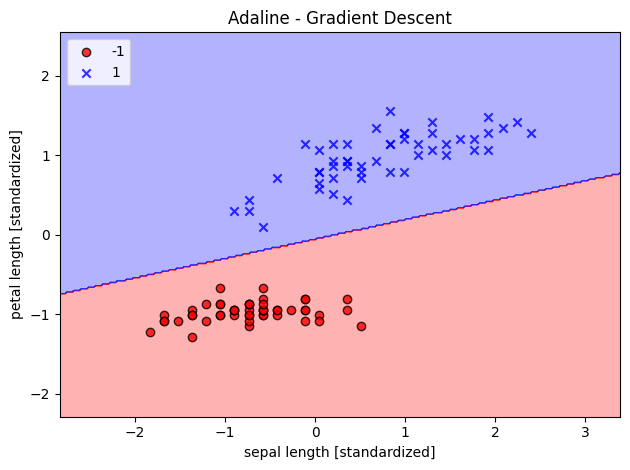

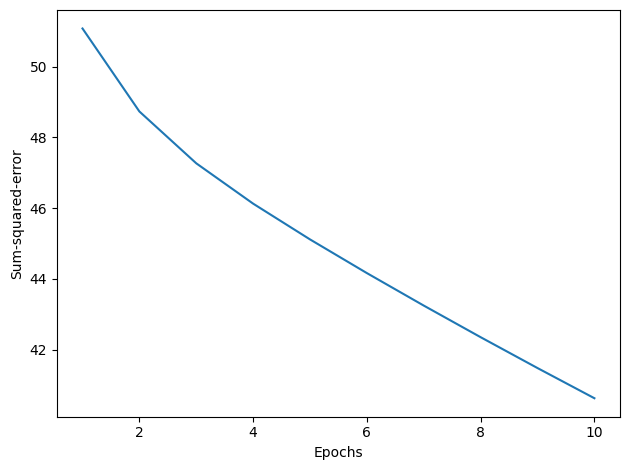

In [74]:
Adaline_1_Feature1 = Adaline(n_iter=10, eta=0.0001)
Adaline_1_Feature1.fit(X_percep1, y_percep1)

plot_decision_regions(X_std, y_percep1, classifier = Adaline_1_Feature1)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(Adaline_1_Feature1.cost_) + 1), Adaline_1_Feature1.cost_)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

## Perceptron - Setosa & Virginica (sepal length vs petal length)

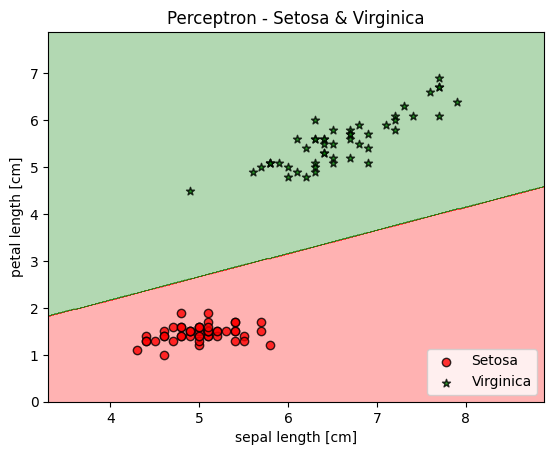

In [75]:
y1 = df.iloc[0:50, 4].values
y2 = df.iloc[100:150, 4].values
x1 = df.iloc[0:50, [0, 2]].values
x2 = df.iloc[100:150, [0, 2]].values

X = np.concatenate([x1, x2])
y = np.concatenate((y1, y2))


y = np.where(y == 'Iris-setosa', -1, 1)

# Creating Perceptron model
perceptron_model = Perceptron(eta0=0.1, max_iter=10)
perceptron_model.fit(X, y)

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', '*')
    colors = ('red', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
plot_decision_regions(X, y, classifier=perceptron_model)
plt.title('Perceptron - Setosa & Virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

L = plt.legend(loc = 'lower right')
L.get_texts()[0].set_text("Setosa")
L.get_texts()[1].set_text("Virginica")

plt.show()

### Determining an appropriate learning rate ### 
Same as before, .0001 leads to a decreasing graph/

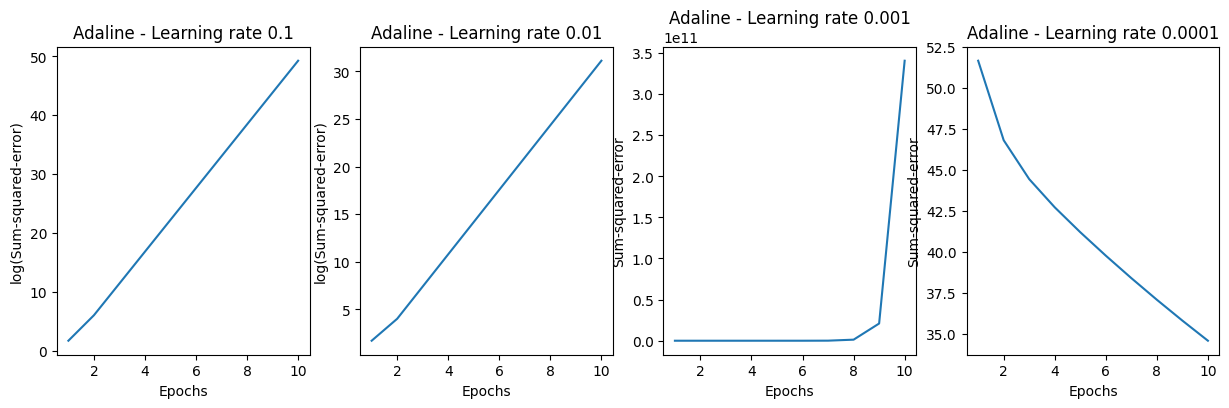

In [76]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 4))

ada1 = Adaline(n_iter = 10, eta = 0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = Adaline(n_iter = 10, eta = 0.01).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.01')

ada3 = Adaline(n_iter = 10, eta = 0.001).fit(X, y)
ax[2].plot(range(1, len(ada3.cost_) + 1), ada3.cost_)
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.001')

ada4 = Adaline(n_iter = 10, eta = 0.0001).fit(X, y)
ax[3].plot(range(1, len(ada4.cost_) + 1), ada4.cost_)
ax[3].set_xlabel('Epochs')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

#### Standardizing features - Obtained from Python Machine Learning 3rd Edition Chapter 2 ####

In [77]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

## Adaline model for Setosa & Virginica (sepal length vs. petal length) ##
### Adaline graph and the Sum-Squared-Error graph ###



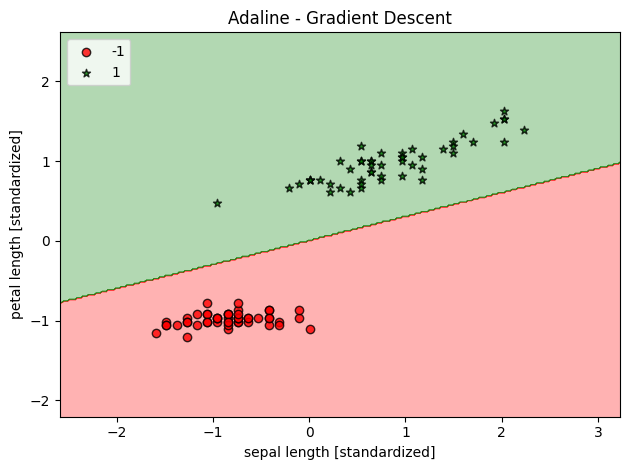

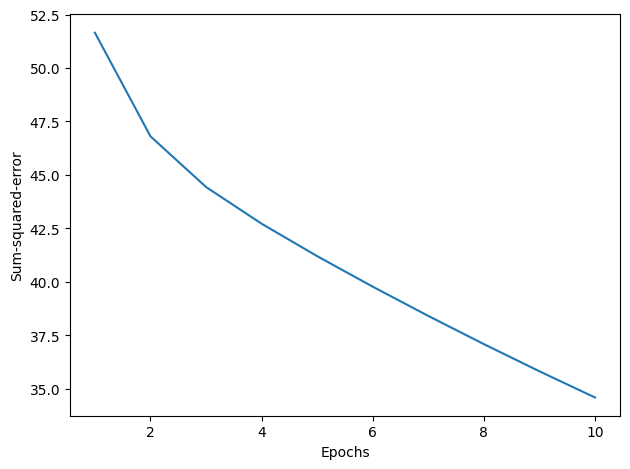

In [78]:
Adaline_1_Feature2 = Adaline(n_iter=10, eta=0.0001)
Adaline_1_Feature2.fit(X, y)

plot_decision_regions(X_std, y, classifier = Adaline_1_Feature2)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(Adaline_1_Feature2.cost_) + 1), Adaline_1_Feature2.cost_)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

# 3 Features #

## Data preparation & Spliting for Testing and Training ##

In [94]:
# Reset X & y values
iris = datasets.load_iris()
IC = np.unique(y)

X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split

# Split the data for 70% training and 30% testing (35 in training, 15 in test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

## 3D Graphs showing the numerous combinations of Setosa and Virginica using different classes ##

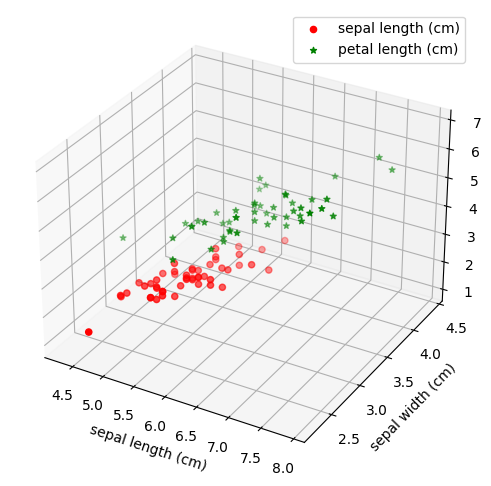

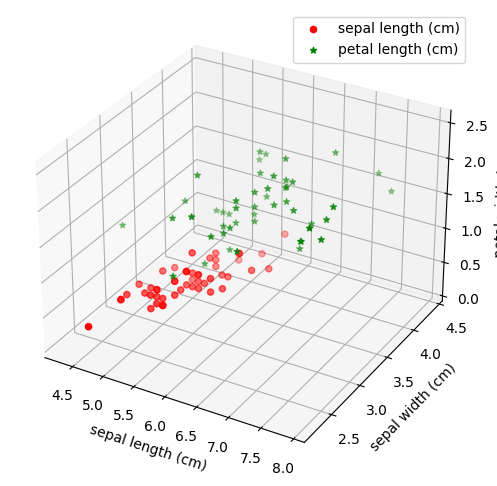

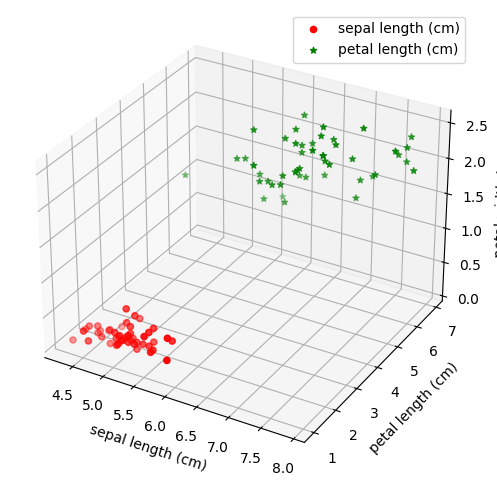

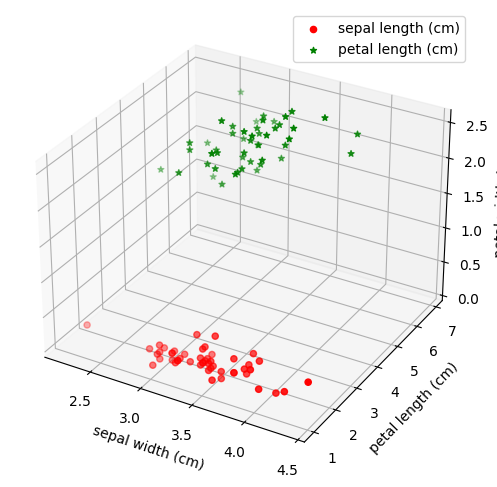

In [110]:
plt.close('all')

iris = datasets.load_iris()

X = iris.data
y = iris.target

IC = np.unique(y)

IrisClassification = ('Setosa', 'Versicolor', 'Virginica')
pltColor = ('red', 'blue', 'green')
IrisFeatures=("sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)")

ix = [0,0,0,1]
iy = [1,1,2,2]
iz = [2,3,3,3]

for m in range(4):
    
    ixm = ix[m]
    iym = iy[m]
    izm = iz[m]
    xF = IrisFeatures[ixm]
    yF = IrisFeatures[iym]
    zF = IrisFeatures[izm]

    fig = plt.figure(figsize=(6,6))    
    ax = plt.axes(projection='3d')   
    
    ax.scatter3D(X[y == IC[0],ixm], X[y == IC[0],iym], X[y == IC[0],izm], 
        color=pltColor[0], marker = 'o', label=IrisFeatures[0])
    ax.scatter3D(X[y == IC[2],ixm], X[y == IC[2],iym], X[y == IC[2],izm], 
        color=pltColor[2], marker = '*', label=IrisFeatures[2])

    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)            
    ax.legend(loc='upper right', fontsize='medium')

#### Standardizing features - Obtained from Python Machine Learning 3rd Edition Chapter 2 ####

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 4 Features #

## Data Preparation & Splitting for Testing and Training

In [82]:
# Reset X & y values
y = df.iloc[:, 4].values
X = df.iloc[:, 0:4].values

from sklearn.model_selection import train_test_split

# Split the data for 70% training and 30% testing (35 in training, 15 in test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#### Standardizing features - Obtained from Python Machine Learning 3rd Edition Chapter 2 ####

In [83]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Perceptron - 4 Features ###

In [84]:
from sklearn.metrics import accuracy_score
Perceptron_4_Features = Perceptron(max_iter = 100, tol = .0001, n_jobs = -1, random_state = 1)

Perceptron_4_Features.fit(X_train_std, y_train)

y_pred = Perceptron_4_Features.predict(X_test_std)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.8


### Adaline - 4 Features ###

In [85]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


Adaline_4_Features = Adaline(n_iter = 150, eta=0.0001)
Adaline_4_Features.fit(X_train_std, y_train)

y_pred = Adaline_4_Features.predict(X_test_std)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.4
